In [4]:
from nltk.corpus import gutenberg
%matplotlib inline

In [5]:
gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [6]:
emma = gutenberg.words('austen-emma.txt')
len(emma)

192427

In [8]:
for fileid in gutenberg.fileids():
    nChars = len(gutenberg.raw(fileid))
    nWords = len(gutenberg.words(fileid))
    nSents = len(gutenberg.sents(fileid))
    nVocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print '{0} {1} {2} {3}'.format(nChars/nWords, nWords/nSents, nWords/nVocab, fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [10]:
from nltk.corpus import inaugural
import nltk

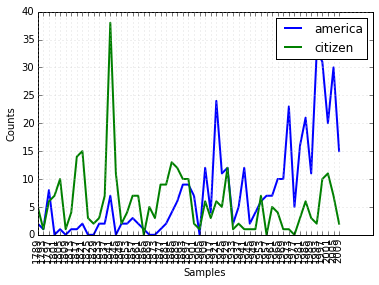

In [11]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                                for fileid in inaugural.fileids()
                                for w in inaugural.words(fileid)
                                for target in ['america', 'citizen']
                                if w.lower().startswith(target))
cfd.plot()

In [12]:
from nltk.corpus import brown

In [13]:
genre_word = [(genre, word)
             for genre in brown.categories()
             for word in brown.words(categories=genre)]
len(genre_word)

1161192

In [14]:
genre_word[:4]

[(u'adventure', u'Dan'),
 (u'adventure', u'Morgan'),
 (u'adventure', u'told'),
 (u'adventure', u'himself')]

In [15]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.conditions()

[u'mystery',
 u'belles_lettres',
 u'humor',
 u'government',
 u'fiction',
 u'reviews',
 u'religion',
 u'romance',
 u'science_fiction',
 u'adventure',
 u'editorial',
 u'hobbies',
 u'lore',
 u'news',
 u'learned']

In [17]:
sent = ['In','the','beginning','god','created','the','heaven','and','the','earth','.']
nltk.bigrams(sent)

<generator object bigrams at 0x000000008C537948>

In [21]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print '{0}'.format(word)
        word = cfdist[word].max()

In [19]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
print cfd['living']

<FreqDist with 6 samples and 16 outcomes>


In [22]:
generate_model(cfd, 'living')

living
creature
that
he
said
,
and
the
land
of
the
land
of
the
land


In [23]:
names = nltk.corpus.names
names.fileids()

[u'female.txt', u'male.txt']

In [24]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

[u'Abbey',
 u'Abbie',
 u'Abby',
 u'Addie',
 u'Adrian',
 u'Adrien',
 u'Ajay',
 u'Alex',
 u'Alexis',
 u'Alfie',
 u'Ali',
 u'Alix',
 u'Allie',
 u'Allyn',
 u'Andie',
 u'Andrea',
 u'Andy',
 u'Angel',
 u'Angie',
 u'Ariel',
 u'Ashley',
 u'Aubrey',
 u'Augustine',
 u'Austin',
 u'Averil',
 u'Barrie',
 u'Barry',
 u'Beau',
 u'Bennie',
 u'Benny',
 u'Bernie',
 u'Bert',
 u'Bertie',
 u'Bill',
 u'Billie',
 u'Billy',
 u'Blair',
 u'Blake',
 u'Bo',
 u'Bobbie',
 u'Bobby',
 u'Brandy',
 u'Brett',
 u'Britt',
 u'Brook',
 u'Brooke',
 u'Brooks',
 u'Bryn',
 u'Cal',
 u'Cam',
 u'Cammy',
 u'Carey',
 u'Carlie',
 u'Carlin',
 u'Carmine',
 u'Carroll',
 u'Cary',
 u'Caryl',
 u'Casey',
 u'Cass',
 u'Cat',
 u'Cecil',
 u'Chad',
 u'Chris',
 u'Chrissy',
 u'Christian',
 u'Christie',
 u'Christy',
 u'Clair',
 u'Claire',
 u'Clare',
 u'Claude',
 u'Clem',
 u'Clemmie',
 u'Cody',
 u'Connie',
 u'Constantine',
 u'Corey',
 u'Corrie',
 u'Cory',
 u'Courtney',
 u'Cris',
 u'Daffy',
 u'Dale',
 u'Dallas',
 u'Dana',
 u'Dani',
 u'Daniel',
 u'Dann

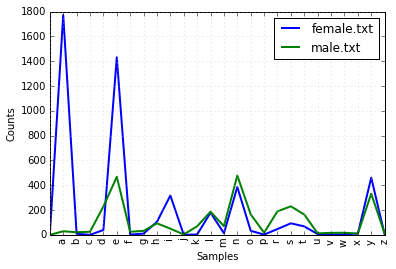

In [26]:
cfd = nltk.ConditionalFreqDist(
                (fileid, name[-1])
                for fileid in names.fileids()
                for name in names.words(fileid))
cfd.plot()

### Accessing Synonyms via WordNet

In [27]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [29]:
wn.synset('car.n.01').lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']

In [30]:
wn.synset('car.n.01').definition()

u'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [31]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[26]

Synset('stanley_steamer.n.01')